# Toy Data Sets

the real secret to being good at statistics is to spend some time on toy data! Change the numbers and see what comes out when you have more or less data, or when the groups are more of less similar!

## Imports!

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Making pretend data
In our pretend data set we are going to look at the height in cm of men and women.

stats.norm is the normal distribution in python. We will preted like we are collecting data from two groups, who's data is normally distributed.

Here we generate 1000 data points in each group with norm(mean, sd). If this were a real, empirical data set we would have to get 1000 men and 1000 women and measure their height.

For our pretend data we will assume that men are, on average, 185cm tall and women 166cm tall, both with a standard deviation of 20. 





In [3]:
n_male = stats.norm(185, 20)
y_male = n_male.rvs(100)

n_female = stats.norm(166, 20)
y_female = n_female.rvs(100)

now we can pretend that we measured the first 10 females and they were this tall:

In [4]:
print(y_female[0:10])

[207.3322179  177.75823357 189.7189465  179.14571171 151.87734885
 187.51443193 136.46193359 194.80594818 165.61464552 177.36581929]


or look at the distribution as a histogram or a smooth line plot:

(array([ 7.,  7.,  8., 12., 14., 16., 13., 18.,  4.,  1.]),
 array([127.07984898, 135.10508588, 143.13032277, 151.15555966,
        159.18079655, 167.20603344, 175.23127033, 183.25650722,
        191.28174411, 199.30698101, 207.3322179 ]),
 <BarContainer object of 10 artists>)

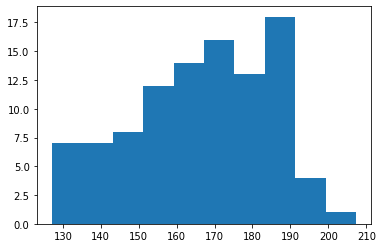

In [6]:
plt.hist(y_female)

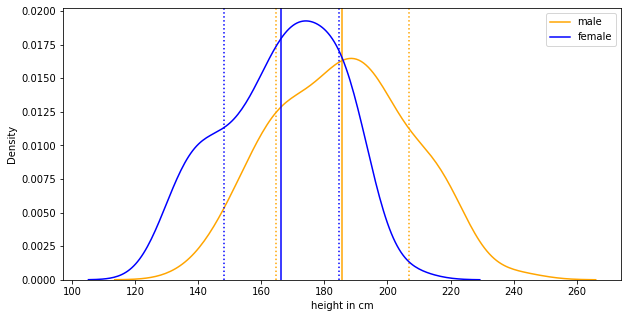

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

sns.kdeplot(y_male, ax=ax, c="orange", label="male")
ax.axvline(np.mean(y_male), c="orange")
ax.axvline(np.mean(y_male)+np.std(y_male), c="orange", ls=":")
ax.axvline(np.mean(y_male)-np.std(y_male), c="orange", ls=":")

sns.kdeplot(y_female, ax=ax, c="blue", label="female")
ax.axvline(np.mean(y_female), c="blue")
ax.axvline(np.mean(y_female)+np.std(y_female), c="blue", ls=":")
ax.axvline(np.mean(y_female)-np.std(y_female), c="blue", ls=":")

ax.legend()
ax.set_xlabel("height in cm")
fig.savefig("height.png", transparent=True)

We want to know whether the wo groups are different, i.e. whether men and women are actually different in height. The plot suggests yes, but how do we prove it?

Using null hypothesis significance testing, we can check whether the data we measured are significantly different from each other. Here we use a t-test.

- Our null Hypothesis is: **there is no difference between the heights of men and women**

- Our alternative hypothesis is: **men and women are differently tall**

The p-value tells us: if there were no difference between the heights of men and women, how likely is it that we got *these* data. 

- If p is low, it is unlikely that we got this data if the null hypothesis were true, so maybe we should believe more in the alternative hypothsesis. 

- If the p value is high, it the data are very likely to have been found if the null hyposesis were true, so we should tend to believe in it!

In [14]:
t2, p2 = stats.ttest_ind(y_male,y_female)
print("p = " + str(p2))
if p2<0.05:
    print("p is smaller than 0.05, so the probability of the data given the null hypothesis is less than 5%.")
if p2<0.001:
    print("p is smaller than 0.001, so the probability of the data given the null hypothesis is less than 1%.")


p = 6.982781627292898e-09
p is smaller than 0.05, so the probability of the data given the null hypothesis is less than 5%.
p is smaller than 0.001, so the probability of the data given the null hypothesis is less than 1%.


# A More Complex example

We have a plant and we want to knwo under which conditions it likes to grow.

In [9]:
# Toy Data
n_sw = stats.norm(2,4)
y_sw = n_sw.rvs(100)

n_dw = stats.norm(20,4)
y_dw = n_dw.rvs(100)

n_sd = stats.norm(25,4)
y_sd = n_sd.rvs(100)

n_dd = stats.norm(5,4)
y_dd = n_dd.rvs(100)

y_sun = np.concatenate((y_sw, y_sd), axis=0)
y_dark = np.concatenate((y_dw, y_dd), axis=0)
y_water = np.concatenate((y_sw, y_dw), axis=0)
y_dry = np.concatenate((y_sd, y_dd), axis=0)ter

Looking at this plot you might think the plant grows best in dry environments.

(0.0, 20.0)

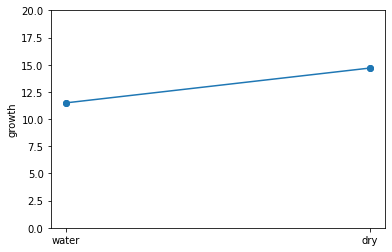

In [10]:
plt.scatter(["water", "dry"], [y_water.mean(), y_dry.mean()])
plt.plot(["water", "dry"], [y_water.mean(), y_dry.mean()], marker="o")
plt.ylabel("growth")
plt.ylim(0,20)

its even significant, with the T-test!

In [11]:
t2, p2 = stats.ttest_ind(y_water,y_dry)
print("p = " + str(p2))
if p2<0.05:
    print("p is smaller than 0.05, so the probability of the data given the null hypothesis is less than 5%.")
if p2<0.001:
    print("p is smaller than 0.001, so the probability of the data given the null hypothesis is less than 1%.")


p = 0.002031162454087938
p is smaller than 0.05, so the probability of the data given the null hypothesis is less than 5%.


But if you look at the distribution of the data, that should be the first clue that something is wrong

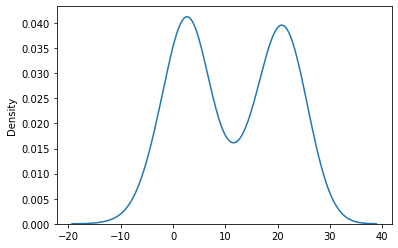

In [128]:
sns.kdeplot(y_water)

That is not a normal distribution of variance! 

Maybe we should think what else has an impact on plant growth: control for amount of sunlight!

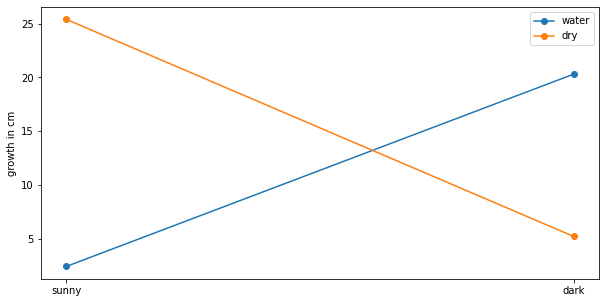

In [149]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(["sunny","dark"], [y_sw.mean(), y_dw.mean()], label="water", marker="o")
ax.plot(["sunny","dark"], [y_sd.mean(),y_dd.mean()],  label="dry", marker="o")
ax.set_ylabel("growth in cm")
ax.legend()

And now the variance within our group also looks normal.

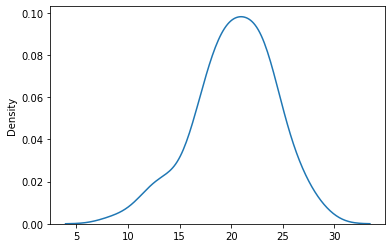

In [171]:
sns.kdeplot(y_dw)

This teaches us that we
- need well-controlled experiments
- should never omit any groups that we know about